In [2]:
import pandas as pd
import numpy as np
from plotnine import *

#<font size="20+"> <font color="blue"> **Scatter-plot**</font>

Un scatter plot (o gráfico de puntos) es un tipo de gráfico que usa puntos para representar los valores de dos o más variables numéricas diferentes.  En un scatter plot la posición de cada punto en los ejes horizontales y verticales indica los valores que toma un individio en particular.



## **¿Cuándo deberiamos usar un scatter plot?**

Si bien los scatter-plot grafican los valores de dos (o más) variables numéricas para cada sujeto/individuo en nuestra base de datos, la información que nos da el scatter-plot se obtiene al mirar a los puntos en conjunto.

Usando los scatter-plots podemos aprender sobre
1. Relaciones en los datos
2. Patrones en los datos como:
  * Clusters
  * Outliers
  * Bechas en los datos 

###<font color="teal">**Relaciones en los datos:** </font>
* Al usar un scatter plot nos podemos dar cuenta de relaciones lineales (no lineales) entre dos variables numéricas. 

* Procedemos a generar datos simulados para estudiar el tipo de dependencias que.podemos oberbar en un scatter-plot

**Relación lineal positiva**

In [ ]:
np.random.seed(2021)
#Generamos datos simulados

x=np.random.normal(3,1,100)
#Dependencia lineal positiva fuerte 
y1=3*x+np.random.normal(0,1,100)+2
#Dependencia lineal positiva moderada 
y2=3*x+np.random.normal(0,4,100)+6

tipo=np.concatenate((np.repeat("Fuerte",n),np.repeat("Moderada",n)))
df=pd.DataFrame({"x":np.concatenate((x,x)),"y":np.concatenate((y1,y2)),"Tipo":tipo})

Para graficar un scatter-plot utilizamos la sintásis usual de ggplot más el comando **geom_point()**

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


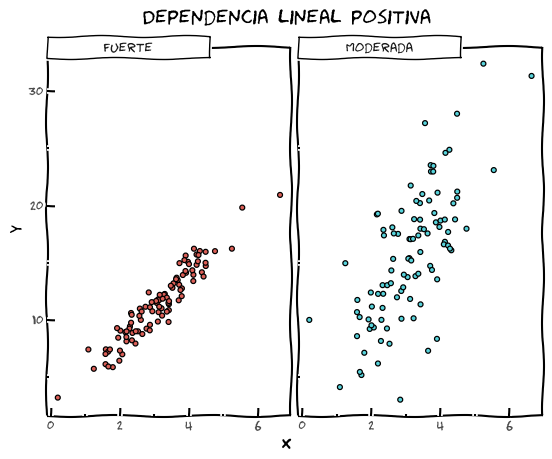

<ggplot: (8771353120609)>

In [ ]:
(ggplot(df)+
aes(x="x",y="y",fill="Tipo")+
geom_point()+
theme_xkcd()+
ggtitle("Dependencia lineal positiva")+
facet_wrap("Tipo")+
guides(fill=False) #Este comando elimina la leyenda asociada a fill
)

**Relación lineal negativa**

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)


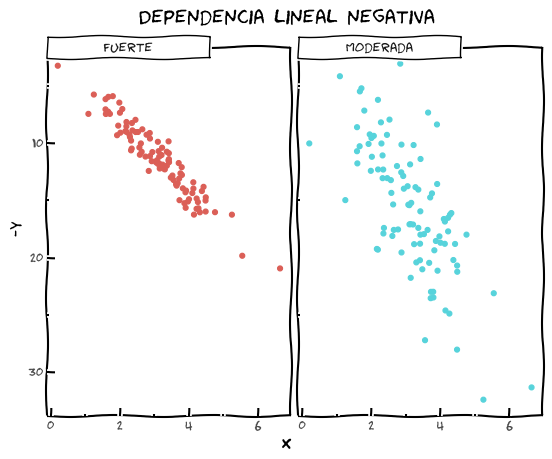

<ggplot: (8771353375793)>

In [ ]:
(ggplot(df)+
aes(x="x",y="-y",color="Tipo")+
geom_point()+
theme_xkcd()+
ggtitle("Dependencia lineal negativa")+
facet_wrap("Tipo")+
guides(color=False) #Este comando elimina la leyenda asociada a fill
)

**Relación no lineal**

In [ ]:
np.random.seed(2021)
#Generamos datos simulados

x=np.random.normal(3,2,100)
#Dependencia no linealfuerte 
y1=(x-3)**2+np.random.normal(0,1,100)
#Dependencia no lineal moderada 
y2=np.sin(4*x)+20+np.random.uniform(-0.5,0.8,100)

tipo=np.concatenate((np.repeat("Fuerte",n),np.repeat("Moderada",n)))
df=pd.DataFrame({"x":np.concatenate((x,x)),"y":np.concatenate((y1,y2)),"Tipo":tipo})

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


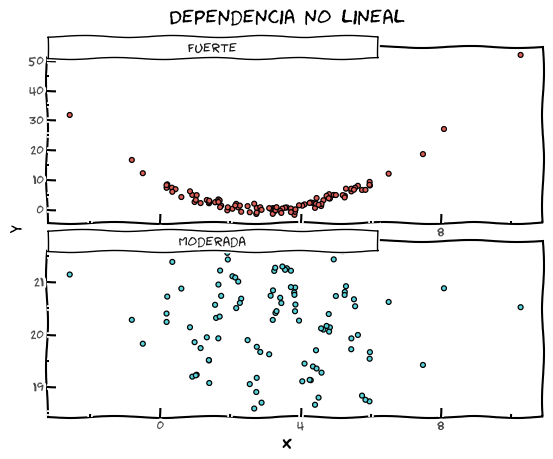

<ggplot: (8771352390125)>

In [ ]:
(ggplot(df)+
aes(x="x",y="y",fill="Tipo")+
geom_point()+
theme_xkcd()+
ggtitle("Dependencia no lineal")+
facet_wrap("Tipo",scales="free",ncol=1)+
guides(fill=False) #Este comando elimina la leyenda asociada a fill
)

**Relación nula o sin relación**

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)


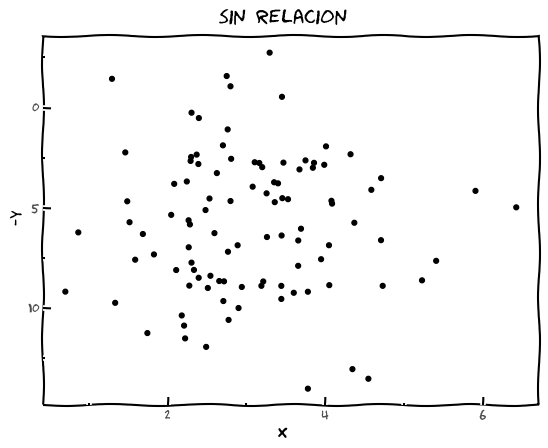

<ggplot: (8771352264205)>

In [ ]:
#Generamos variables "x"
x=np.random.normal(3,1,100)
#Usando las variables "x", generamos variables "y"
y=np.random.normal(0,3.5,100)+6
df=pd.DataFrame({"x":x,"y":y})

#El siguiente gráfico muestra una relación nula o sin relación
(ggplot(df)+
aes(x="x",y="-y")+
geom_point()+
theme_xkcd()+
ggtitle("sin relacion")
)

###<font color="teal">**Patrones en los datos:** </font>

Partimos generando datos simulados que nos servirán para ejemplificar los tipos de patrones que podemos observar usando scatter-plots.


In [ ]:
np.random.seed(2021)
#Generamos datos simulados

#Eje x
x1=np.random.normal(3,1,100)
x2=np.concatenate((np.random.normal(1,2,100),[-3]))

#Eje y
y1=-3*x1+np.random.normal(0,3,100)
y2=6*x2[0:100]+np.random.normal(0,3,100)
y2=np.concatenate((y2,[30]))

tipo=np.concatenate((np.repeat("Grupo 1",n),np.repeat("Grupo 2",n+1)))
df=pd.DataFrame({"x":np.concatenate((x1,x2)),"y":np.concatenate((y1,y2)),"Tipo":tipo})


**Clusters**

Usando scatter-plots podemos identificar fácilmente "clusters" o grupos en los datos.  Un cluster es un grupo de observaciones tal que:

* Todos los elementos dentro de un cluster tiene un comportamiento similar.
* Elementos pertenecientes a clusters distintos se comportan de manera distinta.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)


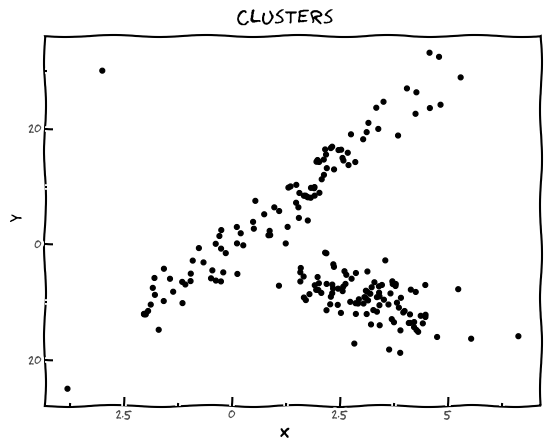

<ggplot: (8771358225641)>

In [ ]:
(ggplot(df)+
aes(x="x",y="y")+
geom_point()+
theme_xkcd()+
ggtitle("Clusters")
)

**Outliers**

Usando este tipo de gráfico, también podemos detectar outliers o observaciones atípicas. Por ejemplo, podemos observar una observación atípica para el grupo 2 en el cuadrante superior izquierdo.

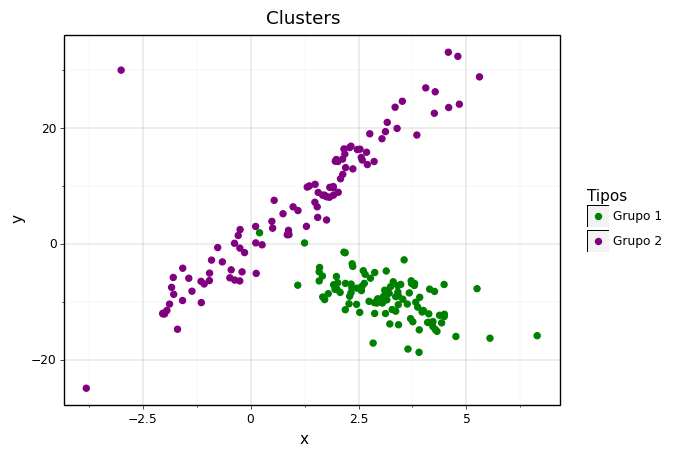

<ggplot: (8771353166229)>

In [ ]:
(ggplot(df)+
aes(x="x",y="y",color="Tipo")+
geom_point(size=2)+
theme_linedraw()+
scale_color_manual(name="Tipos",values=["green","purple"])+
ggtitle("Clusters")
)

**Brechas en los datos**

Las brechas en los datos o "gaps" ocurren cuando para una variable númerica no se observan valores en uno o más intervalos determinados 

In [ ]:
np.random.seed(2021)
#Generamos datos simulados

#Eje x
x1=np.random.uniform(1,3.5,50)
x2=np.random.uniform(4,8,50)
x=np.concatenate((x1,x2))

#Eje y
y=-3*x**2+np.random.normal(0,10,100)+2

df=pd.DataFrame({"x":x,"y":y})

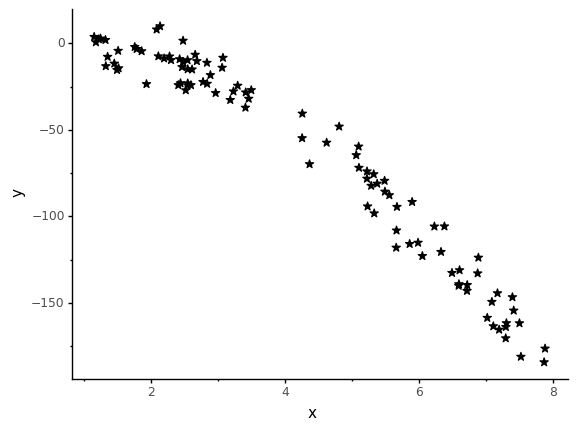

<ggplot: (8771357832953)>

In [ ]:
(ggplot(df)+
aes(x="x",y="y")+
geom_point(shape="*",size=3)+
theme_classic()
)

#<font color="teal">**Datos mpg**</font>
Empezamos cargando los datos que ocuparemos.


  Número |Nombre  | Descripción 
---------|--------|------------------
 1       |mpg     | Miles/(US) gallon
 2       |cyl     | Number of cylinders
 3       |disp    | Displacement (cu.in.)
 4       |hp      | Gross horsepower
 5       |drat    | Rear axle ratio
 6       |wt      | Weight (1000 lbs)
 7       |qsec    | 1/4 mile time
 8       |vs      | Engine (0 = V-shaped, 1 = straight)
 9       |am      |Transmission (0 = automatic, 1 = manual)
 10      |gear    | Number of forward gears
 11      |carb    |Number of carburetors


In [ ]:
#Importamos statsmodels.api para importar algunos set de datos
import statsmodels.api as sm
mtcars = sm.datasets.get_rdataset("mtcars", "datasets", cache=True).data
df = pd.DataFrame(mtcars)
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [ ]:
mtcars.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


#<font color="teal">**Scatter-plots -> geom_point()**</font>

El comando que nos permite graficar un scatter-plot en ggplot() es **geom_point()**. Este comando puede recibir los siguientes atributos

1. **color**: color del borde de los puntos, si fill no es especificado pinta el punto completo.
2. **fill**: color del relleno de los puntos
3. **size**: tamaño de los puntos.
4. **alpha**: transparencia de los puntos.
5. **shape**: forma de los puntos.


<font color="purple">Algunas **shapes** disponibles son:</font>

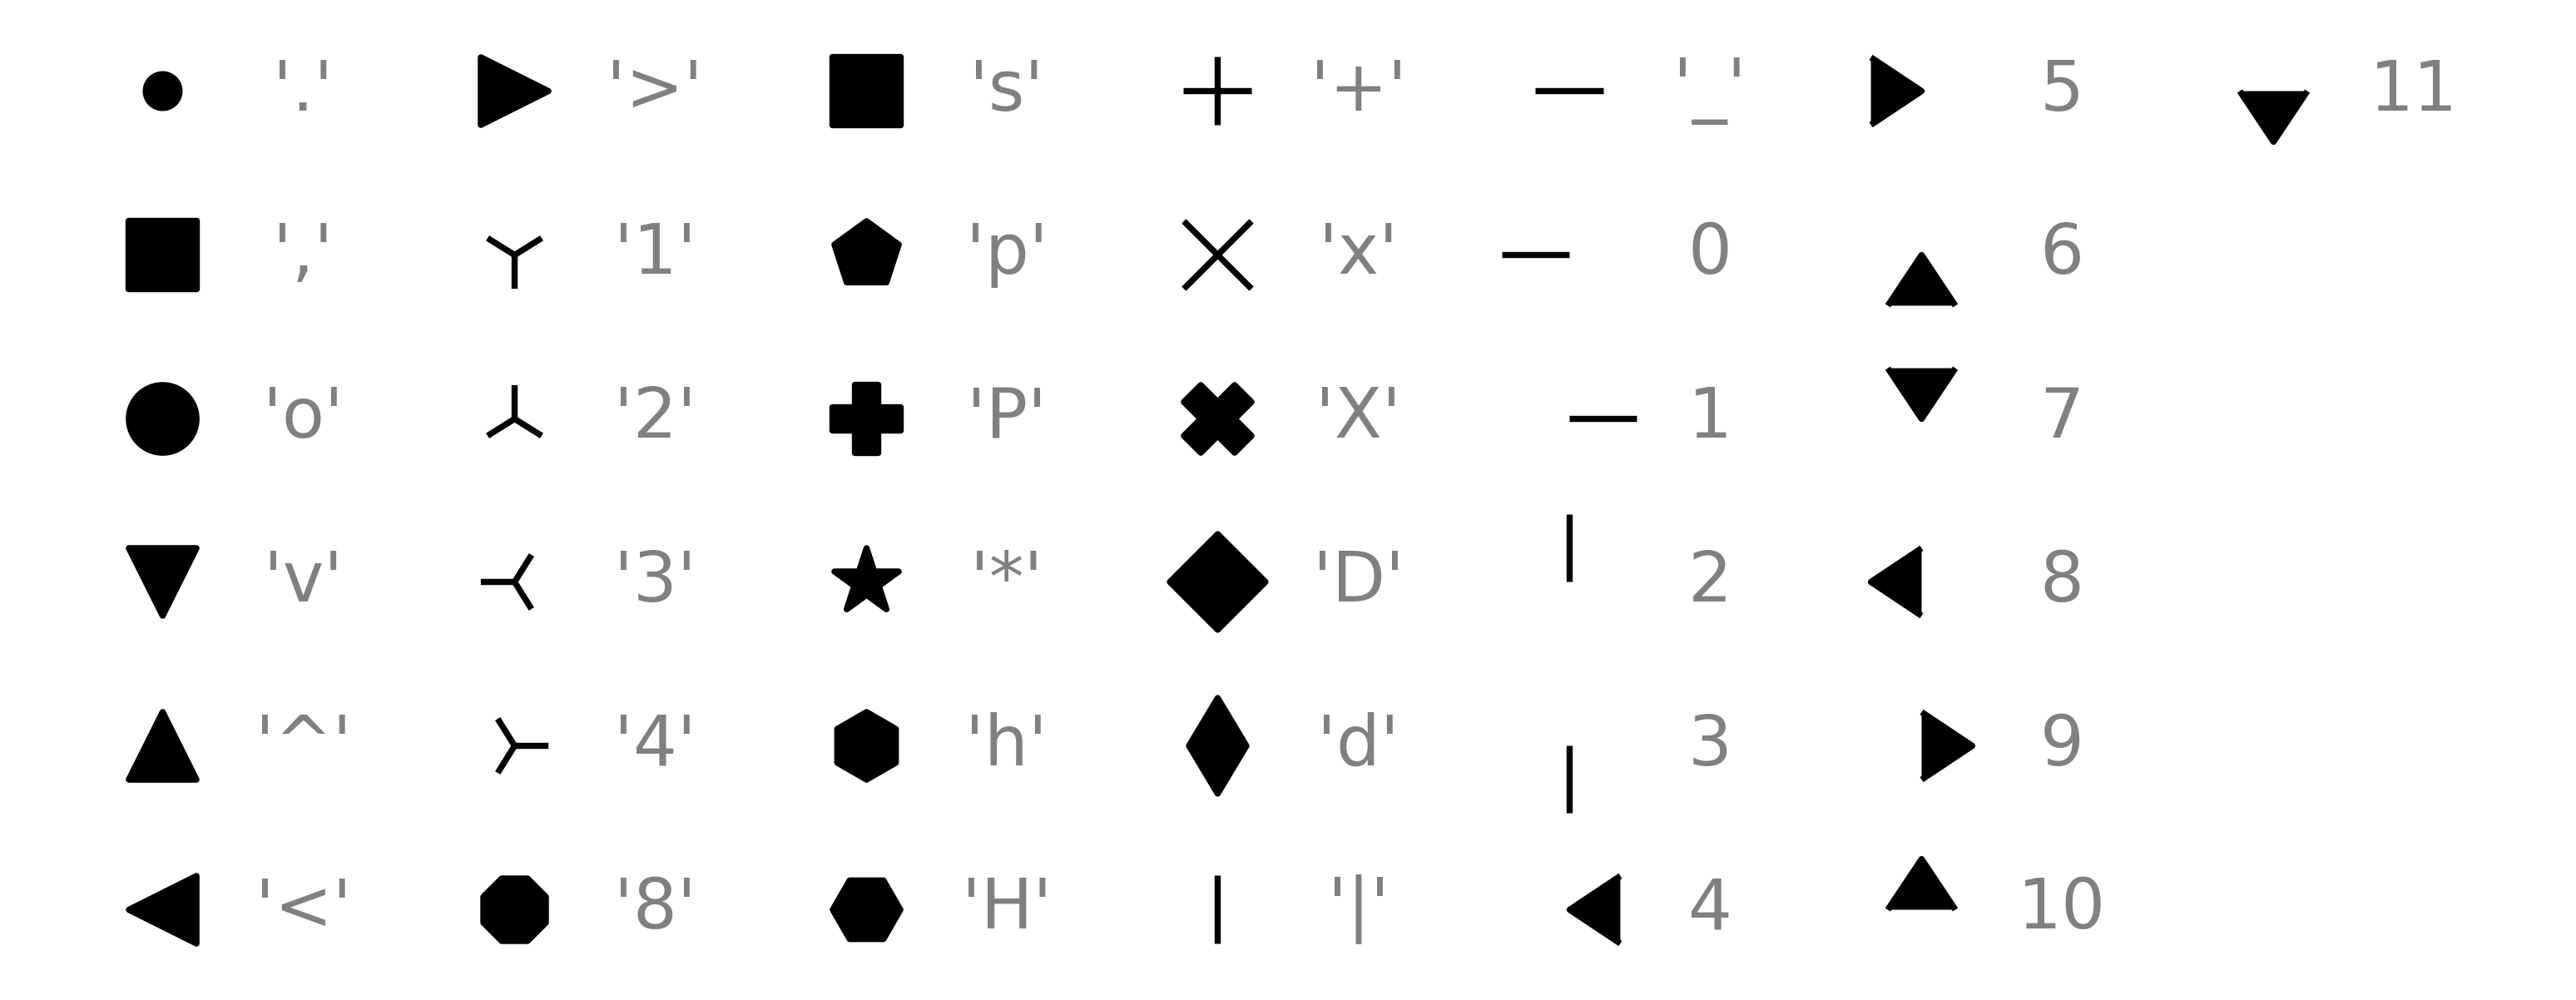

##  **Peso vs Millas/Galón**
Vemos que existe una relación lineal negativa entre el peso del automovil y su eficiencia en términos de Millas/Galón de combustible.

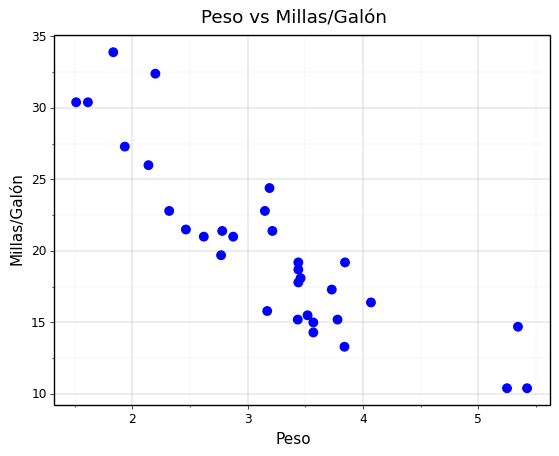

<ggplot: (8771353271941)>

In [ ]:
(ggplot(mtcars)+
aes(x="wt",y="mpg")+
geom_point(shape="o",color="blue",size=3)+
xlab("Peso")+
ylab("Millas/Galón")+
theme_linedraw()+
ggtitle("Peso vs Millas/Galón")
)

###<font color="teal">**Tercera variable categórica:** </font>

Los argumentos **color, fill, size, shape** pueden ser asociados a una tercera variable dentro de **aes()**. Esto nos permite introducir nuva información en el scatter-plot.

In [ ]:
#Pre-procesamos la variable am
mtcars.at[mtcars["am"]==0,"am"]="Automatica"
mtcars.at[mtcars["am"]==1,"am"]="Manual"
mtcars.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,Manual,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,Manual,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,Manual,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,Automatica,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,Automatica,3,2


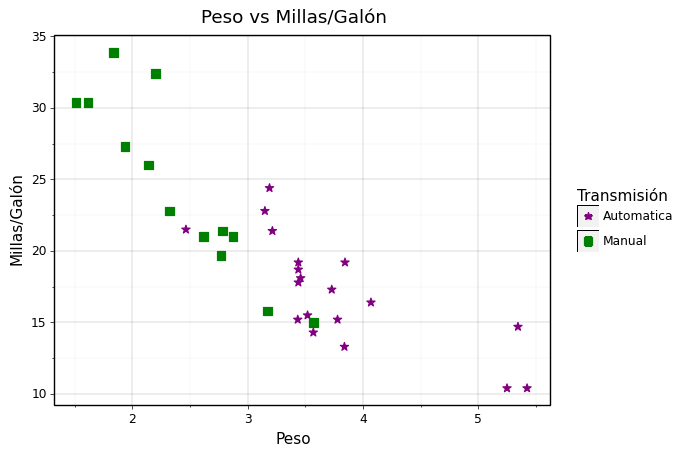

<ggplot: (8771353244881)>

In [ ]:
(ggplot(mtcars)+
aes(x="wt",y="mpg",shape="am",color="am")+
geom_point(size=3)+
xlab("Peso")+
ylab("Millas/Galón")+
theme_linedraw()+
scale_shape_manual(name="Transmisión",values=["*","s"])+
scale_color_manual(name="Transmisión",values=["purple","green"])+
ggtitle("Peso vs Millas/Galón")
)

Otra opción es usar **facet_wrap()**

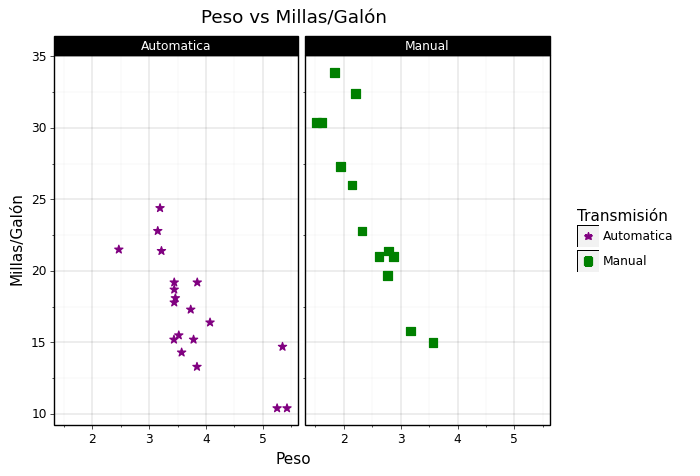

<ggplot: (8771353057989)>

In [ ]:
(ggplot(mtcars)+
aes(x="wt",y="mpg",shape="am",color="am")+
geom_point(size=3)+
xlab("Peso")+
ylab("Millas/Galón")+
theme_linedraw()+
scale_shape_manual(name="Transmisión",values=["*","s"])+
scale_color_manual(name="Transmisión",values=["purple","green"])+
ggtitle("Peso vs Millas/Galón")+
facet_wrap("am")
)

###<font color="teal">**Tercera variable numérica:** </font>

Supongamos que además nos gustaría estudiar el comportamiento de los automóviles por su consumo de combustible. Para esto consideramos la variable

* **mpg:** que nos entrega el número de millas por galón.

Nuevamente, podemos usar los argumentos **color, fill, size** para introducir nueva información respecto a una tercera variable dentro de **aes()**.

**color/fill**

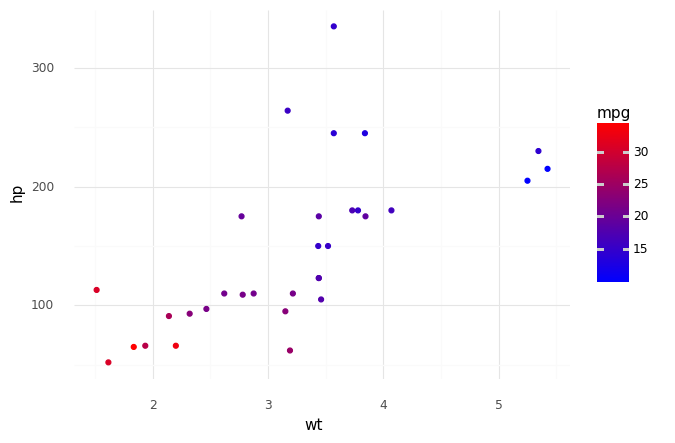

<ggplot: (8771353355909)>

In [ ]:
(ggplot(mtcars)+
aes(x="wt",y="hp",color="mpg")+
geom_point()+
scale_color_gradient(low="blue",high="red")+
theme_minimal()
)

**size**

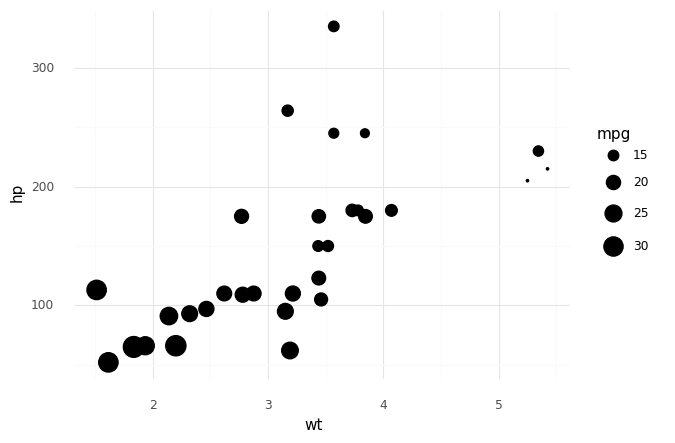

<ggplot: (8771357897557)>

In [ ]:
(ggplot(mtcars)+
aes(x="wt",y="hp",size="mpg")+
geom_point()+
scale_size(range = [0.5, 8])+
theme_minimal()
)

**color/fill y size combinados**

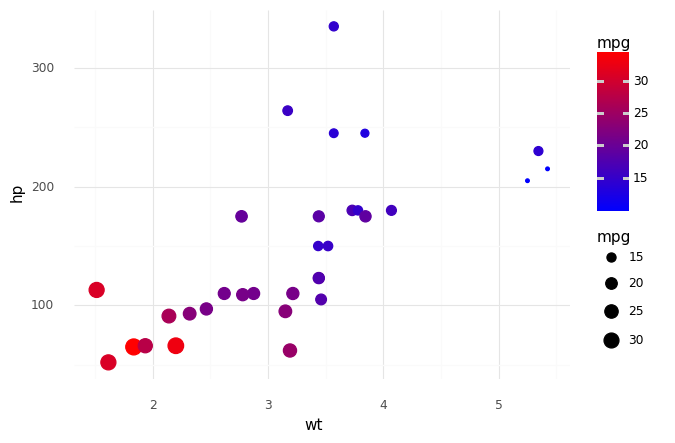

<ggplot: (8771353305501)>

In [ ]:
(ggplot(mtcars)+
aes(x="wt",y="hp",color="mpg",size="mpg")+
geom_point()+
scale_color_gradient(low="blue",high="red")+
theme_minimal()
)

#<font color="teal">**Scatter-plots conectados -> geom_point()+geom_line()**</font>

Para unir los puntos de un scatter-plot podenis usar **geom_line()**. Esta función recibe los argumentos usuales, y:

1. **linetype** controla el tipo de linea. E.g.``"dotted"``, ``"dashed"``, ``"solid"``.

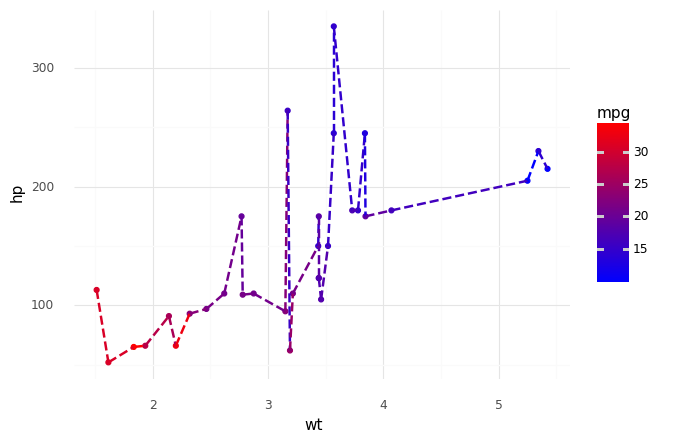

<ggplot: (8771352326841)>

In [ ]:
(ggplot(mtcars)+
aes(x="wt",y="hp",color="mpg")+
geom_point()+
geom_line(linetype="dashed",size=1)+
scale_color_gradient(low="blue",high="red")+
theme_minimal()
)

Note que en el ejemplo de arriba no hace tanto sentido unir los puntos por una linea, ya que cada punto representa un modelo de auto distinto (por lo tanto no podemos esperar una continuidad entre el peso y el número de caballos de fuerza. Sin embargo si tenemos una serie de tiempo, si hace sentido este tipo de gráfico.

In [4]:
# Vamos a instalar una librería para cargar Datasets
!pip install pydataset
from pydataset import data

     |████████████████████████████████| 15.9 MB 107 kB/s 
  Created wheel for pydataset: filename=pydataset-0.2.0-py3-none-any.whl size=15939430 sha256=63de8b3b2f9586ae045d8c2b9cd784b3fe2a2d2502b0eb7435c9220a69185975
  Stored in directory: /root/.cache/pip/wheels/32/26/30/d71562a19eed948eaada9a61b4d722fa358657a3bfb5d151e2
Successfully built pydataset
initiated datasets repo at: /root/.pydataset/


In [7]:
# Número de pasajeros por mes en una aerolínea
AirPassengers = data("AirPassengers")
AirPassengers.head()

,time,AirPassengers
1,1949.000000,112
2,1949.083333,118
3,1949.166667,132
4,1949.250000,129
5,1949.333333,121


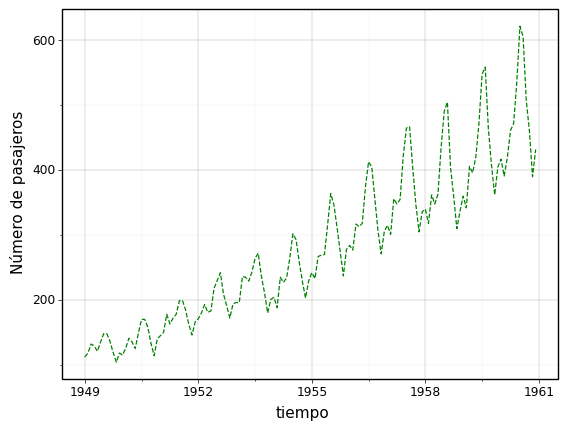

<ggplot: (8791157321605)>

In [29]:
(ggplot(AirPassengers)+
aes(x="time",y="AirPassengers")+
geom_line(linetype="dashed",color="green")+
theme_linedraw()+
scale_x_continuous(breaks=[1949,1952,1955,1958,1961])+ #Con este comando podemos controlar los breaks que mostramos en el eje x
ylab("Número de pasajeros")+
xlab("tiempo")
)
